<a href="https://colab.research.google.com/github/shirleymbeyu/Spotify/blob/master/Spotify_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

# Problem Definition


Conduct an EDA on the dataset and come up with some data visualisations.

Identify popular songs by building a machine learning model that predicts track popularity. Then present the results to the senior management of Spotify. → to increase their revenue

Segment tracks on the platform by building a model that segments the tracks. Then present the results to the senior management of Spotify. → To identify a new genre of music.


# Objectives and Goals

To have a data visualization for the data to be used in the project.

To identify the most popular song using a machine learning model.

To have a track segmentation and to be able to identify a new genre of music.


# Data Sourcing

In [38]:
#importing the libraries to be used in the project
import numpy as np
import pandas as pd

#libraries to be used for visualization
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sb


In [39]:
#Importing the raw data set 
link =  'https://bit.ly/SpotifySongsDs' 
data = pd.read_csv(link)
#Reviewing first 5 rows of the data set
data[:5]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [40]:
#Importing the glossary data                                                                           
glossary = pd.read_csv('spotify_glossary.csv')
glossary

,Variable,class,description
0,track_id,str,Song unique ID
1,track_name,str,Song Name
2,track_artist,str,Song Artist
3,track_popularity,float,Song Popularity (0-100) where higher is better
4,track_album_id,str,Album unique ID
5,track_album_name,str,Song album name
6,track_album_release_date,str,Date when album released
7,playlist_name,str,Name of playlist
8,playlist_id,str,Playlist ID
9,playlist_genre,str,Playlist genre


 # Data Understanding

# Data Prepraration

In [41]:
#Getting the shape of the initial data set
data.shape

(32833, 23)

In [42]:
#getting the information on the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Data cleaning

In [43]:
#removing column attributes we won't be needing for  our analysisD
droped =data.drop(['track_id', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'], axis = 1)
droped[:5]

,track_name,track_artist,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [44]:
# Extract the month from the track release date. 

#first changing the format of the release date column to year-month-date
droped['track_album_release_date'] = pd.to_datetime(droped['track_album_release_date'], format='%Y-%m-%d')

#creating a new column to hold only the months of release
droped['year'] = pd.DatetimeIndex(droped['track_album_release_date']).year
droped['month'] = pd.DatetimeIndex(droped['track_album_release_date']).month
droped

#Checking the data types of the year and month column
print(droped.year.dtypes)
print(droped.month.dtypes)


int64
int64


In [45]:
#Converting duration to minutes
def function_2(row):
    return row['duration_ms'] / 60000

droped['duration_min'] = droped.apply(lambda row: function_2(row), axis=1)

#dropping the column with the duration in miliseconds
spotify = droped.drop('duration_ms', axis=1)

In [46]:
#Checking the number of duplicate observations in our data set
spotify.duplicated().sum()

4484

There seems to be 4,484 duplicate values in our data set which adds up to 13.66% of our data set. This is a relatively huge number to drop but keeping it will also reduce the accurcay of our analysis. 

Therefore I will drop them and work with the remaining 86.34%

In [47]:
spotify.drop_duplicates(inplace = True)
spotify.shape

(28349, 18)

In [48]:
spotify.isna().sum()

track_name                  4
track_artist                4
track_popularity            0
track_album_release_date    0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
year                        0
month                       0
duration_min                0
dtype: int64

There were 4 rows with missing track_name and and artist_name. These wer not dropped since they ahd no huge impact on our analysis.



In [49]:
#Finally I will export my cleaned data set that is ready for analysis
spotify.to_csv('spotify_df.csv', index=False)

# Data analysis

In my analysis I will work with my cleaned data set

In [50]:
df = pd.read_csv('spotify_df.csv')

First I will make a data frame of my continuous variables that range from 0.0-1.0 separate so as to analyze them together

In [51]:
cont = df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']]
cont

,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,0.748,0.916,0.0583,0.102000,0.000000,0.5180
1,0.726,0.815,0.0373,0.072400,0.004210,0.6930
2,0.675,0.931,0.0742,0.079400,0.000023,0.6130
3,0.718,0.930,0.1020,0.028700,0.000009,0.2770
4,0.650,0.833,0.0359,0.080300,0.000000,0.7250
...,...,...,...,...,...,...
28344,0.428,0.922,0.0936,0.076600,0.000000,0.2100
28345,0.522,0.786,0.0420,0.001710,0.004270,0.4000
28346,0.529,0.821,0.0481,0.108000,0.000001,0.4360
28347,0.626,0.888,0.1090,0.007920,0.127000,0.3080


Text(0.5, 1.0, 'continuous variable analysis')

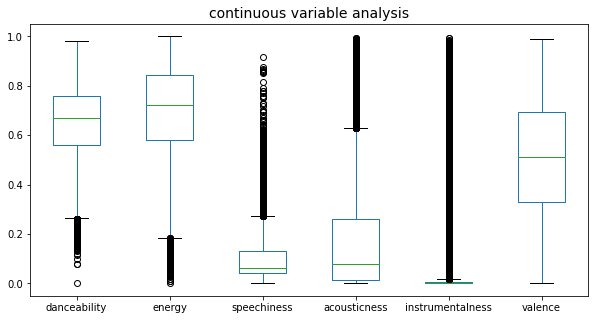

In [52]:
cont_bplot = cont.boxplot(figsize = (10,5), grid = False)
cont_bplot.axes.set_title("continuous variable analysis", fontsize=14)



From the above analysis there seems to be numerous outliers in the continuous variables. Though these can't really be termed as outliers because thy all affect the songs differently.

Valence is the only observation with no outliers

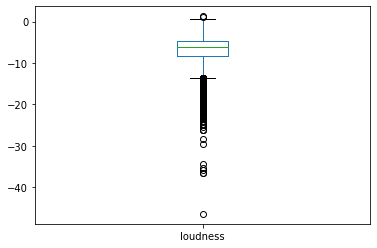

In [53]:
#Checking for outliers in the loudness continuous variable:
df.boxplot(column =['loudness'], grid = False)

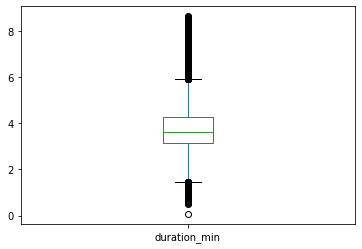

In [54]:
#Checking for outliers in the track duration:
df.boxplot(column =['duration_min'], grid = False)

The duration has outliers from both ends, but rather more on the right end.

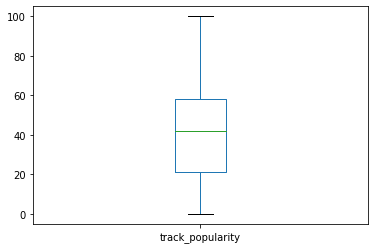

In [55]:
#Finding otliers in track popularity:
df.boxplot(column =['track_popularity'], grid = False)

There were no outliers in the song popularity indicating that there were no instances of a song being extremely popular or extremely inpopular or rather not listened to.

#Questions

1. How are the track observations distributed over the years?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f419337e4e0>,
      dtype=object)

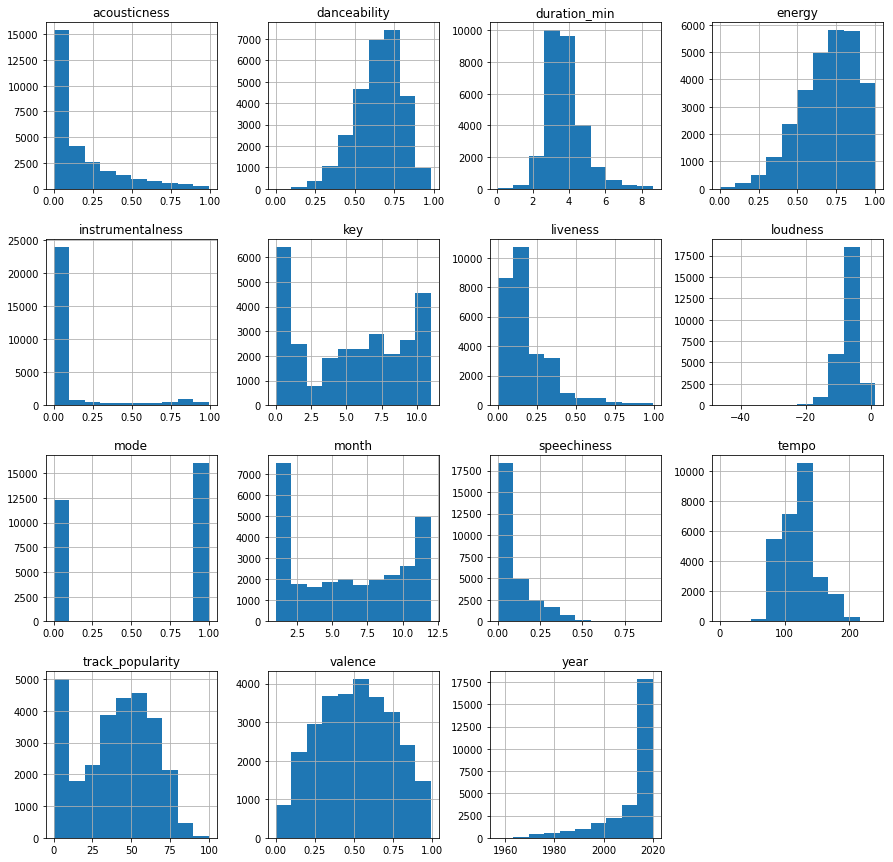

In [56]:
#finding the distribution of the observations in the data set
df.hist(figsize=(15,15))

These distribution graphs go ahead to prove the observations in from the boxplots.

2. How are these variables related to track popularity?

In [70]:
#Checked for the relationship between the various varaibles.
#This was done with a correlation co-efficient 
spotify.corr()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,month,duration_min
track_popularity,1.000000,0.046725,-0.103579,-0.008224,0.037248,0.016402,0.005228,0.091759,-0.124229,-0.052800,0.022606,0.004524,0.044701,0.080462,-0.139600
danceability,0.046725,1.000000,-0.081390,0.007141,0.015398,-0.055220,0.183526,-0.028912,-0.002332,-0.127077,0.333749,-0.184689,0.144115,0.047353,-0.087591
energy,-0.103579,-0.081390,1.000000,0.012862,0.682183,-0.004443,-0.029114,-0.545893,0.023706,0.163670,0.149799,0.151447,0.050180,-0.022456,0.017484
key,-0.008224,0.007141,0.012862,1.000000,-0.000580,-0.176271,0.023095,0.004106,0.007506,0.002083,0.021493,-0.010409,0.001085,0.002784,0.018884
loudness,0.037248,0.015398,0.682183,-0.000580,1.000000,-0.017705,0.012954,-0.371615,-0.154310,0.081933,0.049557,0.096706,0.285339,0.044629,-0.104578
mode,0.016402,-0.055220,-0.004443,-0.176271,-0.017705,1.000000,-0.059698,0.006702,-0.005894,-0.000345,-0.003195,0.016533,-0.087368,-0.028118,0.012754
speechiness,0.005228,0.183526,-0.029114,0.023095,0.012954,-0.059698,1.000000,0.024970,-0.107981,0.059311,0.064720,0.032702,0.105920,0.021417,-0.098476
acousticness,0.091759,-0.028912,-0.545893,0.004106,-0.371615,0.006702,0.024970,1.000000,-0.003029,-0.074556,-0.019117,-0.114362,0.008080,0.028500,-0.094093
instrumentalness,-0.124229,-0.002332,0.023706,0.007506,-0.154310,-0.005894,-0.107981,-0.003029,1.000000,-0.008435,-0.174141,0.021432,0.098642,0.048524,0.058883
liveness,-0.052800,-0.127077,0.163670,0.002083,0.081933,-0.000345,0.059311,-0.074556,-0.008435,1.000000,-0.020005,0.021898,-0.017935,-0.020885,0.007618


None of the variables had a corelation co-efficients above or even close to +/-0.5 to the track_popularity. Therefor none are worth mentioning

This shows that none of the variables are significantly proportional to track_popularity, that is; track popularity cannot be defined solely on a particular variable but a number or rather a combination of them.

From here on the analysis will focus on those with a co-efficient of 0.1 or close to that:


*   acousticness with a corelation co-efficient of 0.091759
*   months with 0.080462
*   energy with -0.103579
*   instrumentalness with -0.124229
*   duration_min with -0.139600







2. Virtually, how does acousticness affect the track_popularity?

<function matplotlib.pyplot.show>

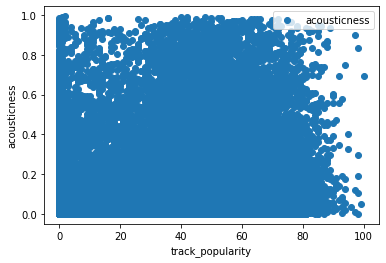

In [89]:
#Done with scatter plot
spotify.plot(x = 'track_popularity', y = 'acousticness', style = 'o')
plt.xlabel('track_popularity')
plt.ylabel('acousticness')
plt.show

3. Virtually, how does energy of a track affect its popularity?

<function matplotlib.pyplot.show>

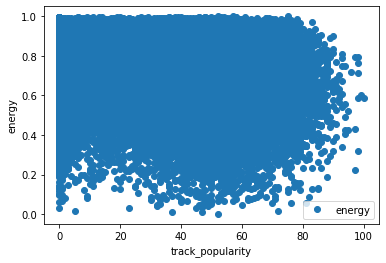

In [91]:
#Plotting energy against popularity
spotify.plot(x = 'track_popularity', y = 'energy', style = 'o')
plt.xlabel('track_popularity')
plt.ylabel('energy')
plt.show

4. Virtually, how does instrumentalness affect track popularity?

<function matplotlib.pyplot.show>

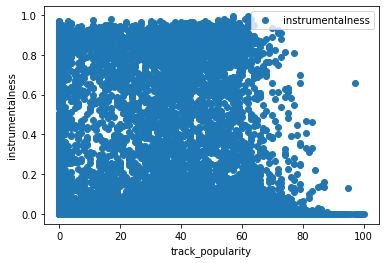

In [92]:
spotify.plot(x = 'track_popularity', y = 'instrumentalness', style = 'o')
plt.xlabel('track_popularity')
plt.ylabel('instrumentalness')
plt.show

From the scatter plot it is clear that tracks with really low instrumentalness dominate the top most popular positions with only a few being popular with high instrumentalness

   4 (a) Which month had the most track releases over the years?

In [82]:
monthly_tracks = spotify['track_name'].groupby([spotify['month']]).count().sort_values(ascending=False)
monthly_tracks[:3]

month
1     6137
11    2875
10    2611
Name: track_name, dtype: int64

 (b) Which month had the most popular (above 50) track releases over the years?

In [81]:
month_of_pops = spotify[(spotify.track_popularity>50)].groupby('month')['track_name'].count().sort_values(ascending = False)
month_of_pops[:3]

month
1     2101
11    1141
10    1030
Name: track_name, dtype: int64

The months are in the same order as those with many track releases over the years

 (C) Virtually, how does the month of track release affect the track_popularity?

<function matplotlib.pyplot.show>

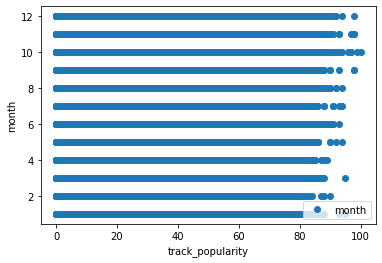

In [ ]:
#Finding whether and how month of track release affects the track_popularity
spotify.plot(x = 'track_popularity', y = 'month', style = 'o')
plt.xlabel('track_popularity')
plt.ylabel('month')
plt.show

From the scatter plot above, the month of track release doesn't seem to affect its popularity. 

Though it would be nice to note that the month of October(10) has a continuous number of popular track releases(having a popularity of above 90) while March(3) has only one and April(4) none.

5. Virtually, how does the duration of a track affect its popularity?

<function matplotlib.pyplot.show>

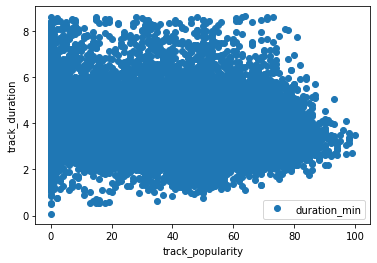

In [75]:
#Finding out whether and how track duration affects tack popularity
spotify.plot(x = 'track_popularity', y = 'duration_min', style = 'o')
plt.xlabel('track_popularity')
plt.ylabel('track_duration')
plt.show

From the scatter plot above it is safe to say that the duration of the track affects it's popularity to some extent:

This is because towards high popularity index the scatter plots tend to come together around the 3 minutes mark.Though it is not a guarantee that a track at around 3 minutes will have high popularity, it is a good starting point.

It is also nice to note that the tracks highly close to the zero mark are more likely to be less popular.



(b) What is the average duration of most popular tracks?

In [88]:
avg_duration_of_pops = spotify[(spotify.track_popularity>50)].groupby('duration_min')['track_name'].count().sort_values(ascending = False)
avg_duration_of_pops

duration_min
2.666667    10
4.000000     9
3.500000     8
3.250000     8
3.066667     8
            ..
3.861117     1
3.861267     1
3.861333     1
3.861350     1
1.113100     1
Name: track_name, Length: 8699, dtype: int64

with most popular tracks having a duration of 2.7 minutes followed by 4.0, 3.5, 3.3 and 3.1 The observation made earlier stands

# Conclusion



1.   Track popularity does not rely on one variable but rather it is affected by a number of factors.
2.   The factors that affect track popularity are not straight forward but do contain a number of outliers.



# Reccomendations and Next step



1.   The model to predict popular tracks should incorporate the varaibles that showed meaningful relationship with track popularity



The next step would be to build a model that predicts track popularity.

Before then it would be nice to go through the analysis using other visualizaton methods to probably get a better understanding of the varaibles.

Later another one to segment track to identify whether there is a new genre.